In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(linewidth=120)

In [8]:
survey_1 = 'SDSS'
survey_2 = 'LSST_DESI'
deltaz = 0.17 # LSST deltaz

This notebook makes a 2D plot of the ratio of statistical-only signal to noise from the Blazek et al case and from the shape-measurement case as a function of a and the percentage covaraince between methods.

In [9]:
# Load StoN from Blazek method for each survey under consideration (only one value). We actually saved the square of what we want.
StoNsq_Blazek_1 = np.loadtxt('../txtfiles/StoNstat_Blazek_'+survey_1+'_deltaz='+str(deltaz)+'_SNonly.txt')
StoNsq_Blazek_2 = np.loadtxt('../txtfiles/StoNstat_Blazek_'+survey_2+'_deltaz='+str(deltaz)+'_LSSTdndzonly_noBterms.txt')
StoN_Blazek_1 = np.sqrt(StoNsq_Blazek_1)
StoN_Blazek_2 = np.sqrt(StoNsq_Blazek_2)
print "StoN Blazek, SDSS=", StoN_Blazek_1, "and LSST+DESI=", StoN_Blazek_2

StoN Blazek, SDSS= 1.39887440425 and LSST+DESI= 0.2371690578


In [10]:
# Load vectors of a and the percentage covariance between methods for the shape measurement case
a_1 = np.loadtxt('../txtfiles/a_survey='+survey_1+'_SNonly.txt')
covperc_1 = np.loadtxt('../txtfiles/rho_survey='+survey_1+'_SNonly.txt')
a_2 = np.loadtxt('../txtfiles/a_survey='+survey_2+'_LSSTdndzonly.txt')
covperc_2 = np.loadtxt('../txtfiles/rho_survey='+survey_2+'_LSSTdndzonly.txt')

# Load the matrix of StoN values from the shape-measurement method at each pair of a / % covariance values
StoNsq_shapes_1 = np.loadtxt('../txtfiles/StoNsq_stat_shapes_survey='+survey_1+'_SNonly.txt')
StoN_shapes_1 = np.sqrt(StoNsq_shapes_1)
StoNsq_shapes_2 = np.loadtxt('../txtfiles/StoNsq_stat_shapes_survey='+survey_2+'_LSSTdndzonly.txt')
StoN_shapes_2 = np.sqrt(StoNsq_shapes_2)

/usr/local/lib/python2.7/dist-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python2.7/dist-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


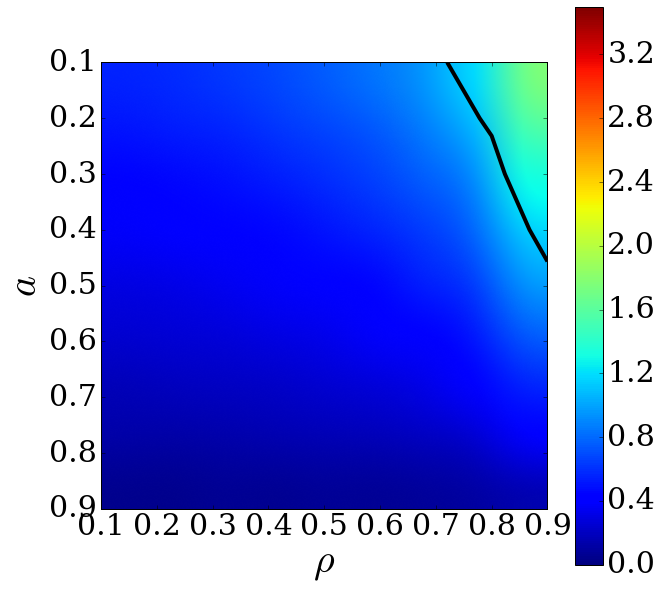

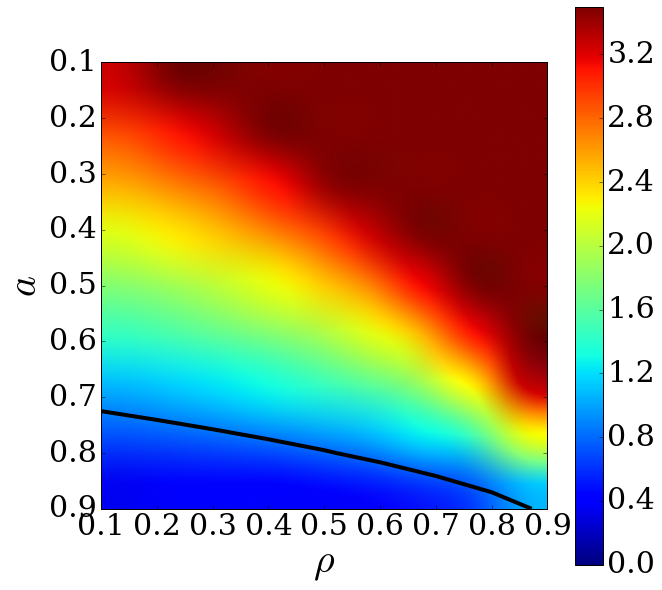

difference= [[ 5.89821824  5.89821824  5.89821824  5.89821824  5.89821824  5.89821823  5.89821823  5.89821823  5.89821822]
 [ 5.89821824  5.89821824  5.89821824  5.89821824  5.89821824  5.89821824  5.89821823  5.89821823  5.89821822]
 [ 5.89821824  5.89821824  5.89821824  5.89821824  5.89821824  5.89821824  5.89821824  5.89821823  5.89821823]
 [ 5.89821824  5.89821824  5.89821824  5.89821824  5.89821824  5.89821824  5.89821824  5.89821823  5.89821823]
 [ 5.89821824  5.89821824  5.89821824  5.89821824  5.89821824  5.89821824  5.89821824  5.89821824  5.89821823]
 [ 5.89821824  5.89821824  5.89821824  5.89821824  5.89821824  5.89821824  5.89821824  5.89821824  5.89821824]
 [ 5.89821824  5.89821824  5.89821824  5.89821824  5.89821824  5.89821824  5.89821824  5.89821824  5.89821824]
 [ 5.89821824  5.89821824  5.89821824  5.89821824  5.89821824  5.89821824  5.89821824  5.89821824  5.89821824]
 [ 5.89821824  5.89821824  5.89821824  5.89821824  5.89821824  5.89821824  5.89821824  5.89821824  5

In [11]:
# Make a 2D colour plot of the ratio of the S to N values for each survey
# If the value plotted is greater than 1, the shape measurment does better for that combination of a and % cov.

StoNratio_1 = StoN_shapes_1 / StoN_Blazek_1

plt.figure(figsize=(10, 10))
plt.rcParams["font.family"] = "serif"
plt.imshow(StoNratio_1, extent=[covperc_1[0], covperc_1[-1], a_1[-1], a_1[0]], aspect=1, interpolation='spline36')
plt.hold(True)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize='30')
plt.clim(0,3.5)
plt.contour(covperc_1, a_1, StoNratio_1, [1.0], colors='k', linewidths=4)
plt.xlabel('$\\rho$', fontsize=40)
plt.ylabel('$a$', fontsize=40)
plt.tick_params(axis='both', labelsize='30')
#plt.title('(Stat S/N, shapes method) / (Stat S/N, Blazek method), SDSS', fontsize=20)
plt.show()
#plt.tight_layout()
#plt.savefig('../plots/StoN_2d_stat_'+survey_1+'.png')
#plt.close()

StoNratio_2 = StoN_shapes_2 / StoN_Blazek_2

plt.figure(figsize=(10, 10))
plt.rcParams["font.family"] = "serif"
plt.imshow(StoNratio_2, extent=[covperc_2[0], covperc_2[-1], a_2[-1], a_2[0]], aspect=1, interpolation='spline36')
plt.hold(True)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize='30')
plt.clim(0,3.5)
plt.contour(covperc_2, a_2, StoNratio_2, [1.0], colors='k', linewidths=4)
plt.xlabel('$\\rho$', fontsize=40)
plt.ylabel('$a$', fontsize=40)
plt.tick_params(axis='both', labelsize='30')
plt.show()
#plt.tight_layout()
#plt.savefig('../plots/StoN_2d_stat_'+survey_2+'.png')

# These ratios should be off by a value independent of a / covperc. What is it?
print "difference=", StoNratio_2 / StoNratio_1